# Consigna
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

<strong>El trabajo se organiza en tres partes:</strong>

## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

1. Detección y eliminación de Outliers

2. Encoding

3. Imputación de valores faltantes

4. Escalado de datos

5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

#### Importamos librerías

In [1]:
#IMPORTAMOS LIBRERÍAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

#### Importamos dataset

In [2]:
#IMPORTAMOS DATASET
df = pd.read_csv('../Bloque 1/DS_Proyecto_01_Datos_Properati.csv')
print("Numpero de filas: " , len(df.index))
print("Numpero de columnas: " , len(df.columns))
df.head(5)

Numpero de filas:  146660
Numpero de columnas:  19


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#### Datos estadísticos

In [3]:
# Visualizamos datos estadísticos
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


<div style="background-color: bisque; padding: 10px 10px 10px 10px; font-weight:400">
    <h4>Observaciones preliminares</h4>
    Altísima varianza y diferencia entre valores máximos y promedios en valores: 
    <li>surface-total y surfcae_covered</li>
    <li>si bien a niveles menores, podría argüirse también de que la columna price guarda también muchos valores atípicos</li>
    <hr>
    <p>Estos son datos que claramente pueden ser abordados luego en un proceso de detección de outliers</p> 
</div>

<div style="background-color: LightGray; padding: 10px 10px 10px 10px; font-weight:400">
    <h4>Eliminamos columnas que no necesitamos</h4>
<p>No guardan correlación con lo que nos interesa predecir que es el precio de las unidades</p>
</div>

In [4]:
# Dropping columns
df_0 = df.drop(['lat', 'lon', 'start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description', 'operation_type'], axis = 1,  inplace=False)
df_0.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


<div style="background-color:LightGray; padding: 10px 10px 10px 10px; font-weight:400">
    <h4>Eliminamos tipos de instancias que no necesitamos</h4>
    <p>Como veremos en el próximo output, tenemos alrededor de una decena de tipos de unidades. No nos quedaremos con todas ellas. Explicamos las razones en lo siguiente</p>
</div>

In [133]:
df_0["property_type"].value_counts(dropna=False, normalize=False).to_frame() 

,property_type
Departamento,69628
PH,9627
Casa,2036


<div id="criteria" style="background-color: bisque; padding: 10px 10px 10px 10px; font-weight:400">
    <h4>Criterios de congruencia y cohesión </h4>
    <li>Nos quedamos con los 3 tipos de propiedades más significativas en términos de número, como de tipo de propiedad (es más correlcionable pensar en términos de PH, Casas y deptos; que en locales, galpones y fincas) <br></li>
    <li>De la misma manera, hay un desbalance en la muestra de registros, siendo las instancias de Capital Federal la muestra más sobre-representada. Ajustarnos a dichos registros para la construcción de nuestros modelos, parece lo más ajustado.</li>
    <li> Y nos quedamos con los datos relativos a la geografía de Capital Federal así fortalcemos la congruencia de los datos</li></div>

In [6]:
display('tamaño 0', df_0.shape)
df_0 = df_0[(df_0.property_type == 'Departamento') | (df_0.property_type == 'PH') | (df_0.property_type == 'Casa')]
df_0 = df_0[df_0.l2 == 'Capital Federal']

'tamaño 0'

(146660, 9)

In [7]:
display('tamaño 01', df_0.shape)

'tamaño 01'

(91485, 9)

<div style="background-color: bisque; padding: 10px 10px 10px 10px; font-weight:400"><strong>Eliminamos datos incongruentes:</strong>
    <li>Superficie cubierta > superficie total</li>
<p>No puede haber unidades cuya superficie cubierta sea mayor a la total.</p>
</div>


In [8]:
df_0 = df_0[(df_0.surface_total >= df_0.surface_covered)]
df_0.shape

(81291, 9)

# PREPROCESAMIENTO DE DATOS

## Eliminación de outliers
<hr style="color:rgb(240, 240, 240)"></hr>
<div id="outliers" style="background-color: LightGray; padding: 10px 20px 10px 10px">
    <h3>¿Por qué?</h3>
    <p>De entre las estrategias de preprocesamiento mencionadas más arriba y trbajadas durante el desarrollo del curso, la que se refiere a la eliminación de outliers parece ser la más fundamental de todas, pues afectaría a cualquiera de los otros procesos en sus resultdos de implementación, como también afectaría a la construcción de los modelos.</p>
    <p>Si el objeto final de este proyecto pasa por la construcción de un sistema de predicción de precios, sistema que será construido sobre las bases de un modelo, entonces es de fundamenal importancia proceder de forma tal que nos aseguremos la eliminación de desvaríos estadísticos en los datos ya desde un comienzo.</p>
    <p>Por último, hay que tener en cuenta que este dataset ha sido trbajado ya durante el Proyecto 01, por lo que conocemos de la existencia de ciertas instancias de outliers que deberían ser eliminadas en features importantes.
</div>

<div style="background-color: bisque; padding: 10px 10px 10px 10px">
    <h4>Valor STD en:</h4>
    <li>surface_total => 900</li>
    <li>surface_covered => 64</li>
    <li>price => 3</li>
    <hr>
    Procedemos a detectar y eliminar valores atípicos sobre todo en aquellos <i>feautures</i> que presenten un std mayor a 1.5.
    <br>
    Implementamos la estretegia de las 3 sigmas en las columnas mencionadas.
</div>

In [9]:
df_0.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81291.000000,81291.000000,80458.000000,81291.000000,81291.000000,8.129100e+04
mean,3.004957,1.998745,1.554600,112.920348,92.261271,2.657606e+05
std,1.299796,1.045831,0.853083,988.263003,769.777375,3.337463e+05
min,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.500000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [10]:
df_01 = df_0

In [11]:
def outliers(column):
    df_1 = df_0
    print('//-----------------------Distribución en ', column, 'antes de remoción------------------------------------//')
    display(df_1[column].describe())
    plt.figure(figsize = (10,7))
    plt.subplot(2,1,1)
    sns.distplot(df_1[column])
    plt.subplot(2,1,2)
    sns.boxplot(df_1[column])
    plt.show()
    print('//-----------------------Estadística de outliers en ', column, ' antes de remoción --------------------------//')
    media = df_1[column].mean()
    std = df_1[column].std()
    minimo = media - 3 *std
    maximo = media + 3 *std
    outliers = np.logical_or(df_1[column] < minimo, df_1[column] > maximo)
    print('Suma de outliers en ' , column, ' =>', outliers.sum())
    print('Shape before => ', df_0.shape)
    df_1 = df_1[outliers == False]
    print('Shape after => ', df_1.shape)
    print('//-----------------------Impresión de gráficos después de remoción------------------------------------//')
    plt.figure(figsize = (10,7))
    plt.subplot(2,1,1)
    sns.distplot(df_1[column])
    plt.subplot(2,1,2)
    sns.boxplot(df_1[column])
    plt.show()
    print('//-----------------------Estadística de outliers en ', column, ' después de remoción --------------------------//')
    display(df_1[column].describe())
    df_01[column] = df_1[column]

#### surface_total
<hr>
<p style="font-weight:500">STD: > 900 </p>

//-----------------------Distribución en  surface_total antes de remoción------------------------------------//


count     81291.000000
mean        112.920348
std         988.263003
min          12.000000
25%          49.500000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64

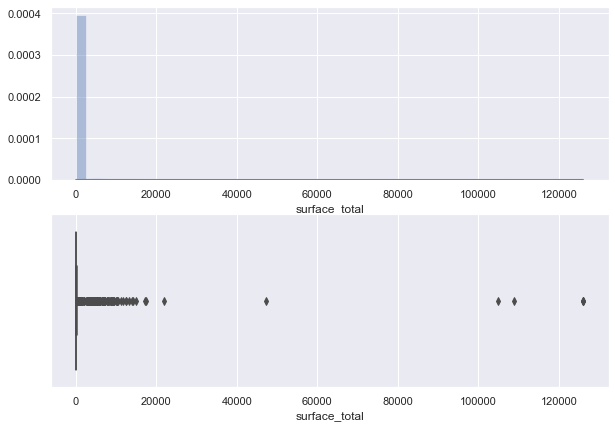

//-----------------------Estadística de outliers en  surface_total  antes de remoción --------------------------//
Suma de outliers en  surface_total  => 115
Shape before =>  (81291, 9)
Shape after =>  (81176, 9)
//-----------------------Impresión de gráficos después de remoción------------------------------------//


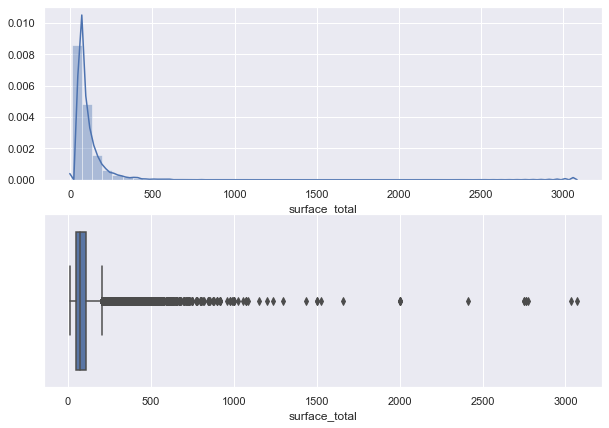

//-----------------------Estadística de outliers en  surface_total  después de remoción --------------------------//


count    81176.000000
mean        96.013194
std         84.746537
min         12.000000
25%         49.000000
50%         71.000000
75%        111.000000
max       3070.000000
Name: surface_total, dtype: float64

In [12]:
outliers('surface_total')

#### surface_covered
<hr>
<p style="font-weight:500">std: > 700</p>

//-----------------------Distribución en  surface_covered antes de remoción------------------------------------//


count     81291.000000
mean         92.261271
std         769.777375
min           1.000000
25%          44.000000
50%          63.000000
75%          96.000000
max      126062.000000
Name: surface_covered, dtype: float64

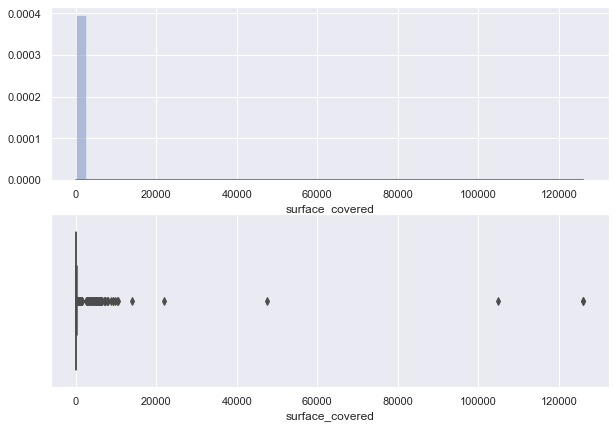

//-----------------------Estadística de outliers en  surface_covered  antes de remoción --------------------------//
Suma de outliers en  surface_covered  => 76
Shape before =>  (81291, 9)
Shape after =>  (81215, 9)
//-----------------------Impresión de gráficos después de remoción------------------------------------//


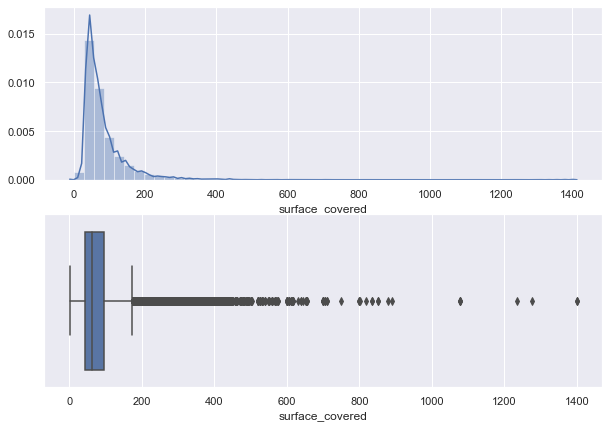

//-----------------------Estadística de outliers en  surface_covered  después de remoción --------------------------//


count    81215.000000
mean        82.264225
std         63.007970
min          1.000000
25%         44.000000
50%         63.000000
75%         96.000000
max       1400.000000
Name: surface_covered, dtype: float64

In [13]:
outliers('surface_covered')

#### Price
<hr>
<p style="font-weight:500">STD: > 3</p>

//-----------------------Distribución en  price antes de remoción------------------------------------//


count    8.129100e+04
mean     2.657606e+05
std      3.337463e+05
min      6.000000e+03
25%      1.250000e+05
50%      1.800000e+05
75%      2.800000e+05
max      3.243423e+07
Name: price, dtype: float64

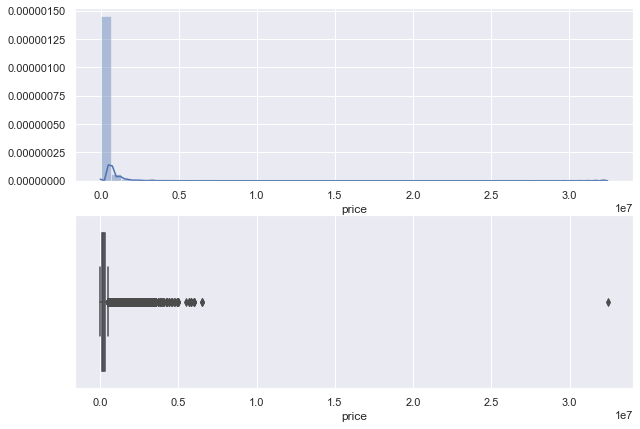

//-----------------------Estadística de outliers en  price  antes de remoción --------------------------//
Suma de outliers en  price  => 1483
Shape before =>  (81291, 9)
Shape after =>  (79808, 9)
//-----------------------Impresión de gráficos después de remoción------------------------------------//


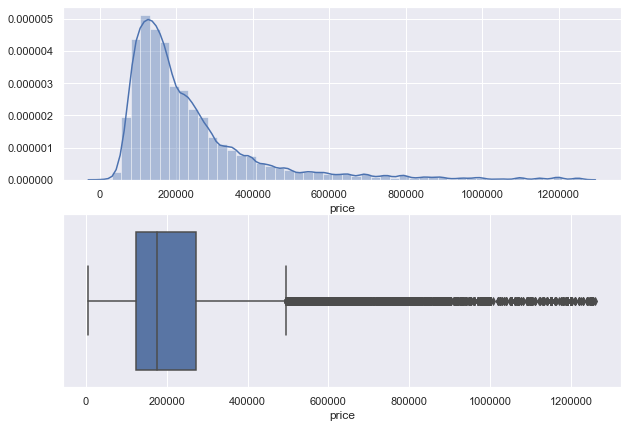

//-----------------------Estadística de outliers en  price  después de remoción --------------------------//


count    7.980800e+04
mean     2.332734e+05
std      1.786064e+05
min      6.000000e+03
25%      1.249000e+05
50%      1.770000e+05
75%      2.730000e+05
max      1.260000e+06
Name: price, dtype: float64

In [14]:
outliers('price')

#### Rooms
<hr>

//-----------------------Distribución en  rooms antes de remoción------------------------------------//


count    81291.000000
mean         3.004957
std          1.299796
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         26.000000
Name: rooms, dtype: float64

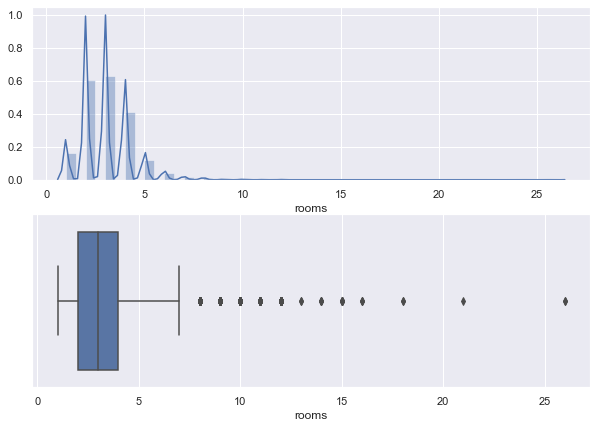

//-----------------------Estadística de outliers en  rooms  antes de remoción --------------------------//
Suma de outliers en  rooms  => 1273
Shape before =>  (81291, 9)
Shape after =>  (80018, 9)
//-----------------------Impresión de gráficos después de remoción------------------------------------//


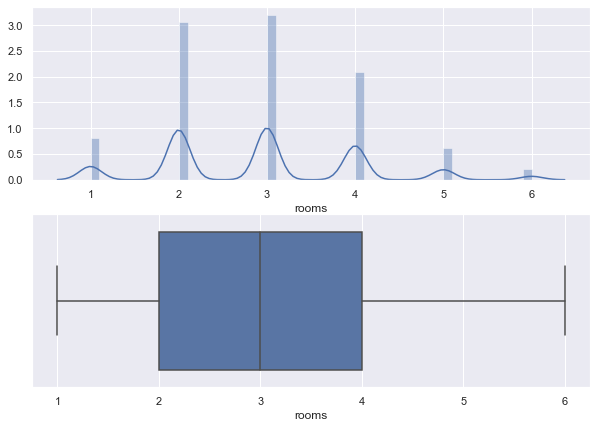

//-----------------------Estadística de outliers en  rooms  después de remoción --------------------------//


count    80018.000000
mean         2.925879
std          1.128083
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: rooms, dtype: float64

In [15]:
outliers('rooms')

#### Bathrooms
<hr>

//-----------------------Distribución en  bathrooms antes de remoción------------------------------------//


count    80458.000000
mean         1.554600
std          0.853083
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64

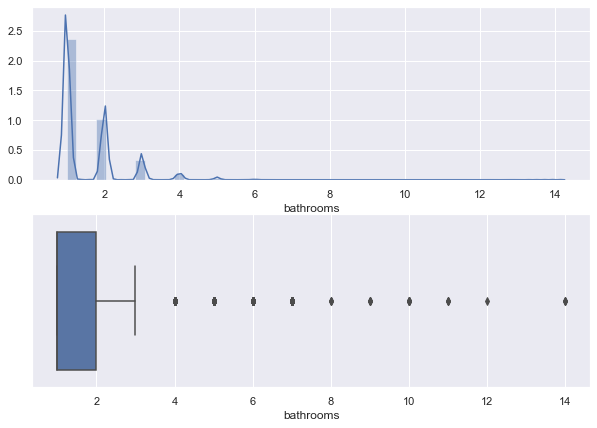

//-----------------------Estadística de outliers en  bathrooms  antes de remoción --------------------------//
Suma de outliers en  bathrooms  => 809
Shape before =>  (81291, 9)
Shape after =>  (80482, 9)
//-----------------------Impresión de gráficos después de remoción------------------------------------//


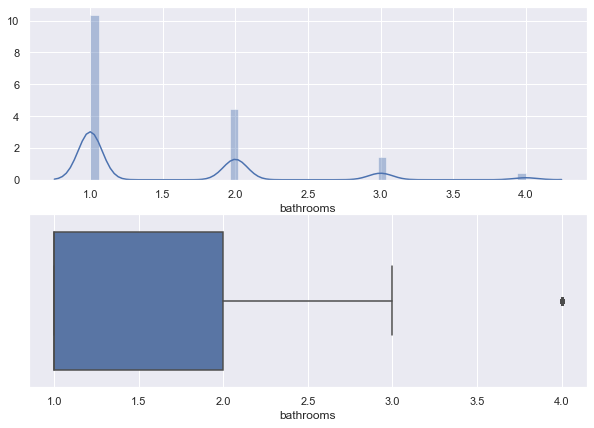

//-----------------------Estadística de outliers en  bathrooms  después de remoción --------------------------//


count    79649.000000
mean         1.515888
std          0.758921
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: bathrooms, dtype: float64

In [16]:
outliers('bathrooms')

#### bedrooms
<hr>

//-----------------------Distribución en  bedrooms antes de remoción------------------------------------//


count    81291.000000
mean         1.998745
std          1.045831
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: bedrooms, dtype: float64

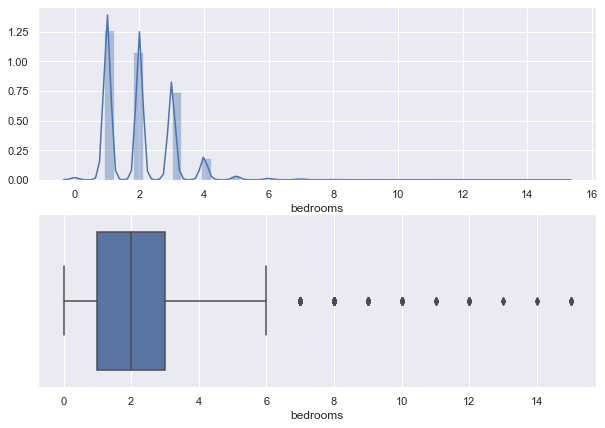

//-----------------------Estadística de outliers en  bedrooms  antes de remoción --------------------------//
Suma de outliers en  bedrooms  => 528
Shape before =>  (81291, 9)
Shape after =>  (80763, 9)
//-----------------------Impresión de gráficos después de remoción------------------------------------//


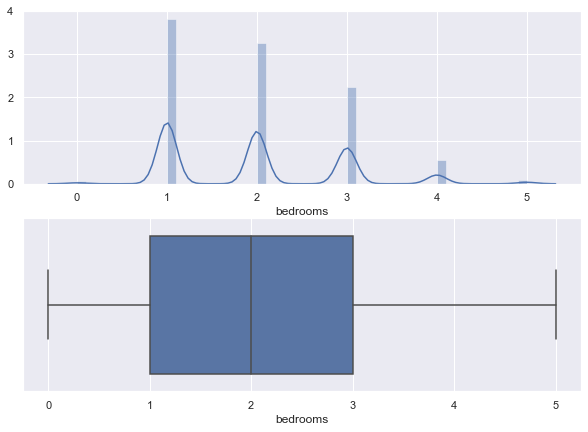

//-----------------------Estadística de outliers en  bedrooms  después de remoción --------------------------//


count    80763.000000
mean         1.966457
std          0.961237
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: bedrooms, dtype: float64

In [17]:
outliers('bedrooms')

In [18]:
#Chequeamos que nuestra variable auxiliar esté como corresponde
df_01.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,80018.000000,80763.000000,79649.000000,81176.000000,81215.000000,7.980800e+04
mean,2.925879,1.966457,1.515888,96.013194,82.264225,2.332734e+05
std,1.128083,0.961237,0.758921,84.746537,63.007970,1.786064e+05
min,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.249000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.770000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.730000e+05
max,6.000000,5.000000,4.000000,3070.000000,1400.000000,1.260000e+06


In [19]:
df_01.isna().sum()

l2                    0
l3                    0
rooms              1273
bedrooms            528
bathrooms          1642
surface_total       115
surface_covered      76
price              1483
property_type         0
dtype: int64

## Escalado de datos
<hr></hr>
<div id="encoding" style="background-color: LightGray; padding: 10px 20px 10px 10px">
    <h3>¿Por qué?</h3>
    <p>Queremos que nuestros modelos sean lo más eficieintes a la hora de predecir el precio de unidades. </p>        
    <p>Para ello, será importante que las métricas que utilicemos queden escaladas de forma tal que nuestros modelos no subestimen ni sobrestimen los valores numéricos de cada feature. </p>        
    <p>Tenemos en cuenta que el escalado es mayormnete propicio para modelos basados en cercanía, como KNN. Puede que al final del proyecto terminemos usando más árboles de decisión, pero todas formas estos no se ven afectados por el proceso de escalado. En definitiva, el proceso es pura ganancia, sobre todo cuando trabajemos con modelos basados en vecinos más cercanos.</p>
</div>

In [20]:
# Creamos una variable auxiliar para el proceso de escalado
dfaux = df_01
df_2 = df_01[['surface_covered', 'surface_total', 'rooms', 'bedrooms', 'bathrooms']]
df_2.head()

,surface_covered,surface_total,rooms,bedrooms,bathrooms
0,140.0,140.0,NaN,NaN,2.0
1,58.0,70.0,2.0,1.0,2.0
2,45.0,45.0,2.0,1.0,1.0
3,50.0,85.0,2.0,1.0,1.0
5,56.0,56.0,2.0,1.0,1.0


In [21]:
media = df_2.mean()
var = df_2.std()
rdata = (df_2 - media)/ var

In [22]:
dfaux['surface_covered'] = rdata['surface_covered']
dfaux['surface_total'] = rdata['surface_total']
dfaux['rooms'] = rdata['rooms']
dfaux['bedrooms'] = rdata['bedrooms']
dfaux['bathrooms'] = df_2['bathrooms']

In [23]:
dfaux.shape

(81291, 9)

In [24]:
dfaux.head(3)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,NaN,NaN,2.0,0.519040,0.916325,153000.0,Departamento
1,Capital Federal,Boedo,-0.820754,-1.005431,2.0,-0.306953,-0.385098,159000.0,PH
2,Capital Federal,Palermo,-0.820754,-1.005431,1.0,-0.601950,-0.591421,125000.0,PH


## Valores faltantes
<hr id="imputacion"></hr>

<div style="background-color: LightGray; padding: 10px 20px 10px 10px">
    <h3>¿Por qué?</h3>
    <p>Cuanto más datos tengamos, mayor potencialidad tendrán nuestros modelos. </p>
    <p>Ante semejante principio, se vuelve toda una pregunta y un problema plantearse acerca de los datos que por un razón u otra no están presentes en nuestros datasets. 
       <br>Ante esta situación, bien puede planterse una estrategia de eliminación de columnas y o filas para paliar así el problema que implica la ausencia de los mismos.
        <br>Sin emabrgo, hay varias estrategias que pueden servirnos para "completar" estos datos. Estas estrategias están basadas en el reconocimiento de que para ciertos valores aausentes de ciertas instancias, existen otros regstros parecidos que peden darnos una pista de cómo inferirlos para acrecentar nuestro dataset. Indagaremos más adelante en una de ellas. 
        
</div>
    

<div style="background-color: bisque; padding: 5px 5px 5px 5px">
    <h5>Observaciones</h5>
    <ul>
        <li>En el dataset original, los datos faltantes son extremedamente más altos.</li>
        <li>Estos han desaparecido prácticamente a través del proceso de eliminación de outliers y a través de la reducción del dataset en términos de features seleccionadas, e instancias de cierto tipo eliminadas.</li>
    </ul>
    <hr>
    <h5>Procedimientos</h5>
    Sólo nos resta generar una estrategia para suplir los valores faltantes en <i>bathrooms</i>. <br>
    <strong>Para eso haremos uso de KNNImputer</strong>
</div>

In [25]:
# Creación de variable auxiliar para el proceso de impuación
dfimp = dfaux

In [26]:
#DATOS FALTANTES
display(dfimp.isna().sum().to_frame())

,0
l2,0
l3,0
rooms,1273
bedrooms,528
bathrooms,1642
surface_total,115
surface_covered,76
price,1483
property_type,0


#### KNNImputer

In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform')
X = dfimp[['rooms', 'bedrooms', 'bathrooms', 'surface_total','surface_covered']]
X_filled = imputer.fit_transform(X)
X_filled_df = pd.DataFrame(X_filled)

In [28]:
dfimp2 = pd.DataFrame()

In [29]:
dfimp['rooms'] = X_filled_df[0].values
dfimp['bedrooms'] = X_filled_df[1].values
dfimp['bathrooms'] = X_filled_df[2].values
dfimp['surface_total'] = X_filled_df[3].values
dfimp['surface_covered'] = X_filled_df[4].values
dfimp.isna().sum()

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price              1483
property_type         0
dtype: int64

In [30]:
dfimp = dfimp.dropna()
dfimp.isna().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [31]:
dfimp.shape

(79808, 9)

## Encoding
<hr></hr>
<div id="encoding" style="background-color: LightGray; padding: 10px 20px 10px 10px">
    <h3>¿Por qué?</h3>
    <p>Queremos que nuestros modelos sean lo más eficieintes a la hora de predecir el precio de unidades. </p>        
    <p>Para ello, una de las vriables a la que naturalmente le vamos a conferir importancia es, justamente, el tipo de propiedad que manejamos. </p>        
    <p>Como este dato lo tenemos registrado en tipo texto, procedemos con el encoding necesario para poder contar con este feature en nuestros modelo. </p>
</div>

<div style="background-color: bisque; padding: 5px 5px 5px 5px">
    <h5>Observaciones</h5>
    <ul>
        <li>De entre las variable de tipo texto que nos interesan están las regiones geográficas y tipo de propiedad, como ya lo dijimos.</li>
        <li>Como l3 (región/barrio) tiene 57 valores, no es seguro avanzar con dicha estrategia dado el crecimiento dimensional de nuestro dataset si lo hacemos.  </li>
    </ul>
    <hr>
    <h5>Procedimientos</h5>
    Teniendo en cuenta que el tipo de propiedad solo tiene 3 valores, procedemos con su encoding <br>
    Para ello haremos uso de <i>pandas.get_dummies()</i>
</div>

In [32]:
# Creamos variables auxiliares para el proceso de encoding
df_3 = dfimp
y = pd.get_dummies(df_3.property_type, prefix="t-")

In [33]:
y.head()

,t-_Casa,t-_Departamento,t-_PH
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1


In [34]:
df_4 = pd.DataFrame()

In [35]:
df_4 = df_3

In [36]:
df_4['casa'] = y['t-_Casa']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_4['depto'] = y['t-_Departamento']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_4['ph'] = y['t-_PH']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_4.drop(['property_type'], axis=1, inplace=True)
df_4.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,casa,depto,ph
0,Capital Federal,San Cristobal,1.129456,1.491352,2.0,0.519040,0.916325,153000.0,0,1,0
1,Capital Federal,Boedo,-0.820754,-1.005431,2.0,-0.306953,-0.385098,159000.0,0,0,1
2,Capital Federal,Palermo,-0.820754,-1.005431,1.0,-0.601950,-0.591421,125000.0,0,0,1
3,Capital Federal,Palermo,-0.820754,-1.005431,1.0,-0.129954,-0.512066,295000.0,0,0,1
5,Capital Federal,Villa Crespo,-0.820754,-1.005431,1.0,-0.472151,-0.416840,150000.0,0,0,1


Text(0.5, 1, 'Correlaciones entre variables')

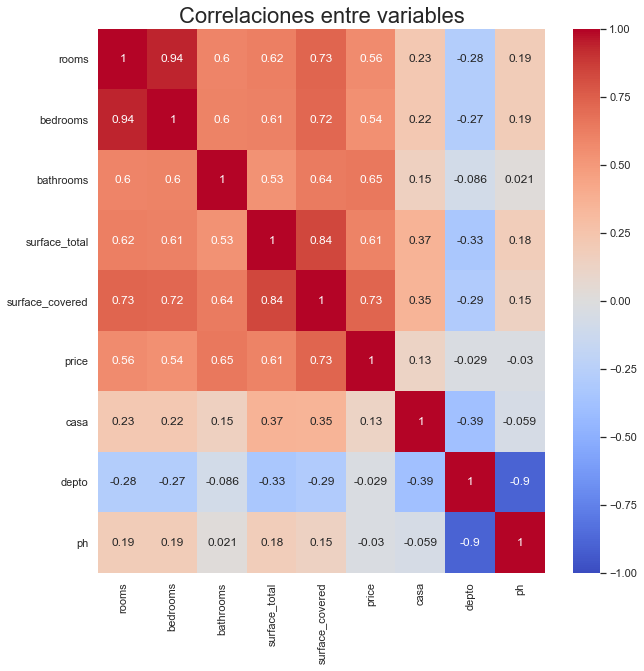

In [40]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df_4.corr(), vmin=-1, cmap='coolwarm', annot= True).set_title('Correlaciones entre variables', size=22)

# Modelos entrenados en el Proyecto 01
<hr id="mod1">

In [41]:
X = df_4[['surface_covered', 'rooms', 'bedrooms', 'bathrooms', 'casa', 'depto', 'ph']]
y = df_4.price

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### KNNeighbors - Proyecto 01

In [44]:
from sklearn.neighbors import KNeighborsRegressor
k = 8 #Mejor rendimiento en proyecto 01
# Creamos el regresor
rg_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                    weights='uniform')
# Lo entrenamos
rg_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [45]:
#Predecimos
knn_y_test_pred = rg_knn.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error
knn_mse = mean_squared_error( y_test, knn_y_test_pred )
knn_rmse = np.sqrt(knn_mse)
knn_rmse

88558.56398640425

In [47]:
#r2
from sklearn.metrics import r2_score
knn_r2 = r2_score(y_test, knn_y_test_pred)

In [48]:
#lista de r2, rmse, modelos y otros datos
r2_list = [0,0, knn_r2]
rmse_list = [171000, 181000, knn_rmse]
models = ['knn', 'dt', 'knn']
projects = ['01', '01', '02']

### Árbol de decisión - Proyecto 01

In [49]:
#Importamos librería correspondiente
from sklearn import tree
#Creamos el modelo de árbol regresor
rg_tree = tree.DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')
#Entrenamos el árbol regresor
rg_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [50]:
#Predecimos
dt_y_test_pred = rg_tree.predict(X_test)

In [51]:
#rmse
dt_mse = mean_squared_error(y_test, dt_y_test_pred)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

89724.47306301666

In [52]:
#r2
dt_r2 = r2_score(y_test, dt_y_test_pred)
dt_r2

0.7493035860761998

In [53]:
#lista de r2, rmse, modelos y otros datos
r2_list.append(dt_r2)
rmse_list.append(dt_rmse)
models.append('dt')
projects.append('02')

In [54]:
basicModels = pd.DataFrame({'model':models,'rmse': rmse_list, 'r2': r2_list, 'project':projects})
basicModels

,model,rmse,r2,project
0,knn,171000.000000,0.000000,01
1,dt,181000.000000,0.000000,01
2,knn,88558.563986,0.755777,02
3,dt,89724.473063,0.749304,02


Text(0.5, 1.0, 'Rendimiento en RMSE de modelos básicos')

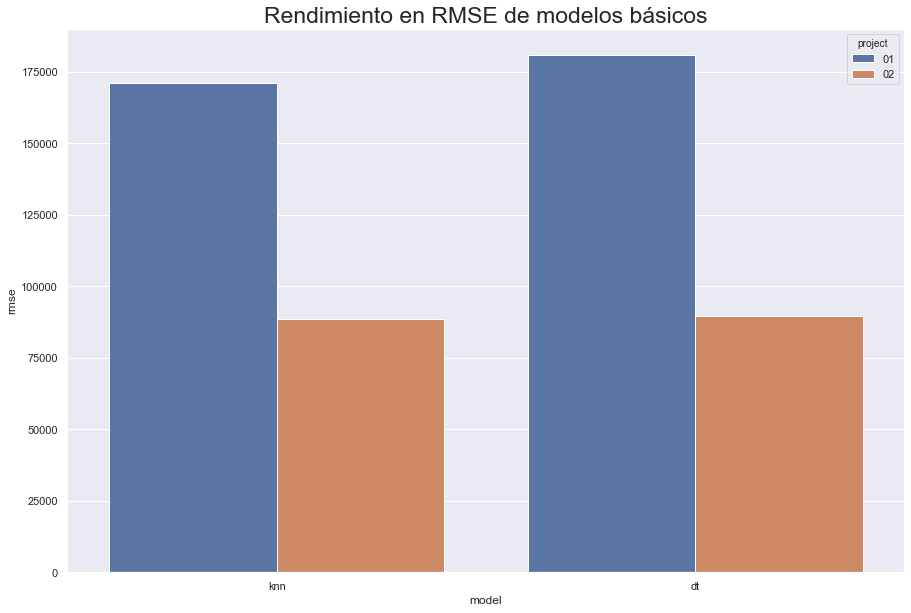

In [55]:
plt.subplots(figsize=(15,10))
sns.barplot(basicModels.model, basicModels.rmse, hue=basicModels.project).set_title('Rendimiento en RMSE de modelos básicos', size=23)

<div style="background-color:lightgrey; padding: 10px 10px 10px 10px">
    <h3>Comparaciones entre modelos del proyecto 01 y 02</h3>
    <hr>
    <li>Como puede observarse, hay una diferencia notoria en el rendimiento de los modelos del proyecto 01 a 02</li>
    <li>La diferencia se evidencia en el hecho de que un proyecto a otro, los RMSE de cada modelo se ha reducido más de un 50% del primer proyecto a éste. </li>
    <li>Las diferencia sólo puede ser explicada por los procesos de pre-preocesamiento que no fueron, justamente, utilizados en el primer proyecto mientras sí lo fueron en este proyecto. </li>
    <li>
        La detección y eliminación de outliers en las columnas con mayores valores atípicos puede sen parte explicar la mayor exactitud de los segundos modelos, pues han sido construídos desde una base de datos más sólida. 
    </li>
    <li>
        De la misma manera, en el proyecto anterior se omitieron todos los registros faltantes que fueron muchísimos. En el marco de este proyecto los valores faltantes han sido imputados por un criterio de vecindad que nos puede asegurar mayor congruencia en los datos faltantes, y en definitiva una mayor base desde la que construir los modelos que aquí construimos 
    </li>
    <li>
        Asimismo, hemos utilizado una estrategia de encoding para apropiarnos de un feauture fundamental para la construcción de los modelos: tipo de propiedad. Valor que poseíamos en formato de tipo texto, pero que aprovechamos en nuestros modelos encoding mediante.
    </li>
    <li>Por último, en términos relativos de porcentaje, vemos que el decrecimiento del RMSE es mucho menor en nuestro modelo de vecinos, lo que puede sugerirnos que el proceso de escalado ha sido efectivo y oportuno.
    </li>
</div>

# PARTE B - Modelos Avanzados
<hr>

6. Elige dos de los modelos avanzados vistos. Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
7. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

8. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## Bagging
<div id="modav"></div>

In [56]:
columnas_entrenamiento = ['surface_covered', 'rooms', 'bedrooms', 'bathrooms', 'casa', 'depto', 'ph']
X = df_4[columnas_entrenamiento]
y = df_4['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
>>> from sklearn.ensemble import BaggingRegressor

In [59]:
>>> regr = BaggingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

In [60]:
bg_y_test_pred = regr.predict(X_test)
bg_y_train_pred = regr.predict(X_train)

In [61]:
#rmse
bg_mse = mean_squared_error(y_test, bg_y_test_pred)
bg_rmse = np.sqrt(bg_mse)
bg_rmse

82897.89555848246

In [62]:
# r2
bgg_r2 = r2_score(y_test, bg_y_test_pred)

In [63]:
#lista de r2, rmse, modelos y otros datos
rmse_list.append(bg_rmse)
models.append('bgg')
projects.append('02')
r2_list.append(bgg_r2)

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
#creación de modelo y entrenamiento
rf_regr = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42).fit(X_train, y_train)

In [96]:
#predicción
rf_y_train_pred = rf_regr.predict(X_train)
rf_y_test_pred = rf_regr.predict(X_test)

In [210]:
#rmse
rf_mse = mean_squared_error(y_test, rf_y_test_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

82964.76781953742

In [98]:
#r2
rf_r2 = r2_score(y_test, rf_y_test_pred)
rf_r2

0.7856548342916813

In [99]:
#lista de r2, rmse, modelos y otros datos
r2_list.append(rf_r2)
rmse_list.append(rf_rmse)
models.append('rf')
projects.append('02')

## Boosting

In [70]:
from sklearn.ensemble import AdaBoostRegressor

In [71]:
#creación y entrenamiento de modelo
adb_regr = AdaBoostRegressor(tree.DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=0, splitter='best'), random_state=42, n_estimators=100).fit(X_train, y_train)

In [72]:
#predicción
adb_y_test_pred = adb_regr.predict(X_test)

In [73]:
#rmse
adb_mse = mean_squared_error(y_test, adb_y_test_pred)
adb_rmse = np.sqrt(adb_mse)
adb_rmse

98269.43959217904

In [74]:
#r2
adb_r2 = r2_score(y_test, adb_y_test_pred)
adb_r2

0.6992793527399712

In [78]:
#lista de r2, rmse, modelos y otros datos
r2_list.append(adb_r2)
rmse_list.append(adb_rmse)
models.append('adb')
projects.append('02')

## XGBoost

In [75]:
import xgboost as xgb

In [76]:
# Creación y entrenamiento de modelo
xgb_regr = xgb.XGBRegressor(n_estimators=250, max_depth=9)
xgb_regr.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=['error'])

[16:07:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-233065	validation_1-error:-233746
[1]	validation_0-error:-233065	validation_1-error:-233746
[2]	validation_0-error:-233065	validation_1-error:-233746
[3]	validation_0-error:-233065	validation_1-error:-233746
[4]	validation_0-error:-233065	validation_1-error:-233746
[5]	validation_0-error:-233065	validation_1-error:-233746
[6]	validation_0-error:-233065	validation_1-error:-233746
[7]	validation_0-error:-233065	validation_1-error:-233746
[8]	validation_0-error:-233065	validation_1-error:-233746
[9]	validation_0-error:-233065	validation_1-error:-233746
[10]	validation_0-error:-233065	validation_1-error:-233746
[11]	validation_0-error:-233065	validation_1-error:-233746
[12]	validation_0-error:-233065	validation_1-error:-233746
[13]	validation_0-error:-233065	validation_1-error:-233746
[14]	validation_0-error:-233065	validation_1-error:-233746
[15]	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [77]:
# Predicción
xgb_y_pred_test = xgb_regr.predict(X_test)

In [79]:
# rmse
xgb_mse = mean_squared_error(y_test, xgb_y_pred_test)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

82004.1431271227

In [80]:
#r2
xgb_r2 = r2_score(y_test, xgb_y_pred_test)
xgb_r2

0.7905897773038695

In [81]:
#lista de r2, rmse, modelos y otros datos
r2_list.append(xgb_r2)
rmse_list.append(xgb_rmse)
models.append('xgb')
projects.append('02')

<div style="background-color:bisque; padding: 10px 10px 10px 10px">
    <h4>Rendimiento de modelos</h4>
    <h5>Modelos Básicos</h5>
    <li><u>RMSE KNN Proyecto 01</u>: 171696</li>
    <li><u>RMSE DT Proyecto 01</u>: 164100</li>
    <li><u>RMSE KNN Proyecto 02</u>: 78129</li>
    <li><u>RMSE DT Proyecto 02</u>: 78667</li>
        <h5>Modelos Avanzados</h5>
        <li><u>Bagging Proyecto 02</u>: 73130</li>
    <li><u>RMSE RandomForest Proyecto 02</u>: 73128</li>
    <li><u>RMSE AdaBoosting</u>: 81121</li>
    <li><strong>RMSE XGBoosting:</strong> 81121</li>
    <hr>
    <li><strong>Diferencia de + 100% </strong></li>
</div>

### Optimización de parámetros
<div id="optparam"></div>

### RandomGridSearch + DecisionTree
<div id="RGS"></div>

In [302]:
# Grilla para Random Search
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["mse", "friedman_mse", "mae"]}

In [300]:
rgs_tree = tree.DecisionTreeRegressor()

In [303]:
# Creación de modelo basado en RanndomGridSearch y entrenamiento
from sklearn.model_selection import RandomizedSearchCV
rgs_tree_model = RandomizedSearchCV(rgs_tree, param_dist, n_iter=100, random_state=0, cv=5).fit(X_train, y_train)

In [304]:
# Impresión de mejores parámetros
print("Mejores parametros: "+str(rgs_tree_model.best_params_))
print("Mejor Score: "+str(rgs_tree_model.best_score_)+'\n')

Mejores parametros: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 3}
Mejor Score: 0.7509373091597874



In [307]:
# Resultados
scores = pd.DataFrame(rgs_tree_model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052736,0.009332,0.004188,9.772239e-04,mse,None,6,1,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.737539,0.746700,0.740716,0.740076,0.752974,0.743601,0.005567,20
1,0.040654,0.001547,0.003510,7.726244e-04,friedman_mse,None,6,3,"{'criterion': 'friedman_mse', 'max_depth': Non...",0.750199,0.753115,0.750025,0.753485,0.747862,0.750937,0.002101,1
2,0.025131,0.000746,0.002992,1.507891e-07,mse,None,1,1,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.745334,0.746774,0.739761,0.744610,0.751266,0.745549,0.003705,14
3,0.010969,0.000630,0.002000,6.322045e-04,mse,3,2,7,"{'criterion': 'mse', 'max_depth': 3, 'max_feat...",0.580448,0.574036,0.496671,0.557074,0.562684,0.554183,0.029908,75
4,8.255444,0.459293,0.002195,3.978253e-04,mae,3,2,6,"{'criterion': 'mae', 'max_depth': 3, 'max_feat...",0.569021,0.475010,0.409139,0.539265,0.553438,0.509174,0.059364,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.029920,0.001410,0.002992,1.784161e-07,mse,None,5,5,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.745511,0.749203,0.745246,0.750849,0.742165,0.746595,0.003083,12
96,0.010970,0.000631,0.001796,3.987792e-04,friedman_mse,3,3,7,"{'criterion': 'friedman_mse', 'max_depth': 3, ...",0.575320,0.603224,0.577253,0.490557,0.579946,0.565260,0.038685,72
97,12.800010,0.543983,0.001796,3.986607e-04,mae,3,5,3,"{'criterion': 'mae', 'max_depth': 3, 'max_feat...",0.541989,0.591821,0.597984,0.597676,0.588734,0.583641,0.021121,68
98,0.012167,0.000399,0.001596,4.884025e-04,mse,3,4,3,"{'criterion': 'mse', 'max_depth': 3, 'max_feat...",0.607791,0.601071,0.585904,0.592128,0.582185,0.593816,0.009473,65


In [88]:
# Entrenamiento de árbol con los criterios del mejor parámetro enconrado y entrenamiento
rgs_tree = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth = None, max_features= 6, min_samples_leaf=3).fit(X_train, y_train)

In [89]:
#Predecimos
rgst_y_test_pred = rgs_tree.predict(X_test)
rgst_y_train_pred = rgs_tree.predict(X_train)

In [82]:
# rmse
# rgst_mse = mean_squared_error(y_test, rgst_y_test_pred)
# rgst_rmse = np.sqrt(rgst_mse)
# rgst_rmse
rgst_rmse = 86862

In [83]:
#r2
# rgst_r2 = r2_score(y_test, rgst_y_test_pred)
rgst_r2 = 0.76504

<div style="background-color:bisque; padding: 10px 10px 10px 10px">
    <h4>Rendimiento de modelos</h4>
    <h5>Modelos Básicos</h5>
    <li><u>RMSE KNN Proyecto 01</u>: 171696</li>
    <li><u>RMSE DT Proyecto 01</u>: 164100</li>
    <li><u>RMSE KNN Proyecto 02</u>: 79486</li>
    <li><u>RMSE DT Proyecto 02</u>: 78571</li>
        <h5>Modelos Avanzados</h5>
    <li><u>RMSE Bagging Proyecto 02</u>: 73057</li>
    <li><u>RMSE RandomForest Proyecto 02</u>: 73057</li>
    <li><u>RMSE Adaboost Proyecto 02</u>: 81121</li>
    <li><u>RMSE XGBoost Proyecto 02</u>: 81121</li>
    <h5>Con optimización de parámatros</h5>
    <li><strong>RMSE RandomGridSearch Proyecto 02:</strong> 73057</li>
    <hr>
    <li><strong>Diferencia de + 100% </strong></li>
</div>

In [84]:
#lista de r2, rmse, modelos y otros datos
r2_list.append(rgst_r2)
rmse_list.append(rgst_rmse)
models.append('rgst')
projects.append('02')

In [85]:
scoring = pd.DataFrame({'model':models,'rmse': rmse_list, 'project':projects, 'r2': r2_list})

Text(0.5, 1.0, 'Rendimiento de modelos - RMSE')

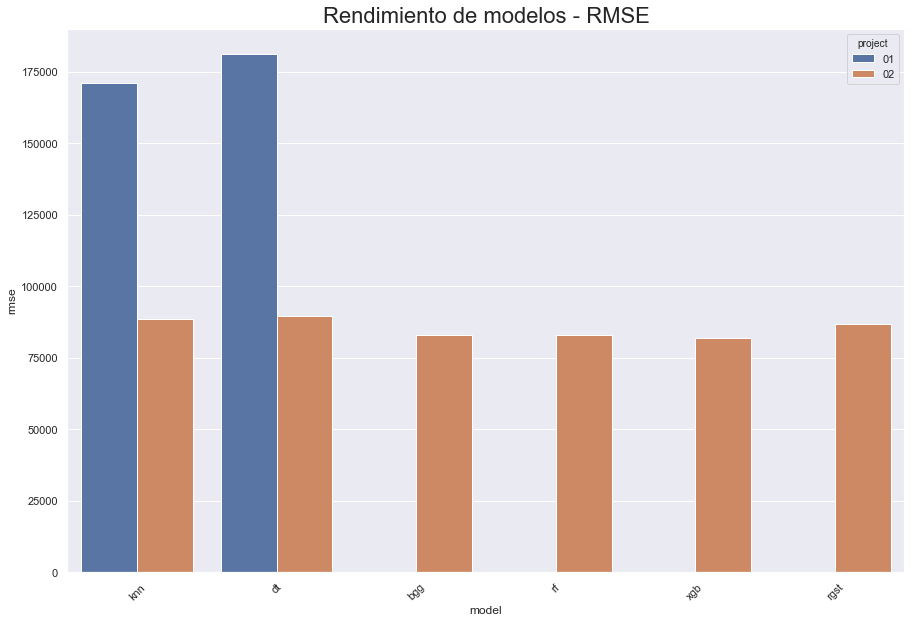

In [86]:
plt.subplots(figsize=(15,10))
sns.barplot(scoring.model, scoring.rmse, hue=scoring.project)
plt.xticks(rotation=45)
plt.title('Rendimiento de modelos - RMSE', size=22)

### Validación cruzada + DecisionTree
<div id="RGS"></div>

In [397]:
# Creación de modelo con validación cruzada
cv_tree = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth = None, max_features= 6, min_samples_leaf=3).fit(X_train, y_train)

In [398]:
cv_tree.score(X_test, y_test)

0.7574030341631286

In [561]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(cv_tree, X, y, cv=5)

In [562]:
# Impresión de resultados
tree_scores

array([0.74561555, 0.76701289, 0.74585225, 0.73753044, 0.77460015])

In [556]:
from sklearn.model_selection import cross_validate
tree_scores = cross_validate(cv_tree, X, y, cv=5)

In [420]:
# r2
print('R2 Cross Validation Score => ', ' [0.74561555, 0.76701289, 0.74585225, 0.73753044, 0.77460015]')

R2 Cross Validation Score =>   [0.74561555, 0.76701289, 0.74585225, 0.73753044, 0.77460015]


In [87]:
scoring

,model,rmse,project,r2
0,knn,171000.000000,01,0.000000
1,dt,181000.000000,01,0.000000
2,knn,88558.563986,02,0.755777
3,dt,89724.473063,02,0.749304
4,bgg,82897.895558,02,0.786000
5,rf,82878.890555,02,0.786098
6,xgb,82004.143127,02,0.790590
7,rgst,86862.000000,02,0.765040


<div style="background-color:bisque; padding: 10px 10px 10px 10px">
    <h1>Observaciones</h1>
    <li>Hay una concordancia entre los valores de r2 y RMSE, en tanto que el primero es más alto cuando el segundo es más bajo</li>
    <li>Como segunda métrica estipulada, el r2_score también nos comunica en este caso que el modelo más exitoso de entre los aquí producidos corresponde a los modelos basados en  <strong>Bagging</strong> y <strong>Random Forest</strong>. Vale notar que ambos modelos estuvieron basados en árboles de decisión. </li>
    <li>De la misma manera, vale notar que en términos de <i>r2</i>, el rendimiento más alto lo alcanza el <strong>XGBoost</strong>. Es un poco sorprendente que en medido en RMSE su score no haya sido tan alto en comparación a los otros. </li>
    <li>Sí vale mencionar que uno de los árboles arrojados por la crossValidation (el quinto), se lleva un r2 superior por una mínima diferencia. </li>
    <hr>
    <li>Dados estos resultados, parece óptimo quedarse con los modelos basados en <strong>Bagging</strong> y <strong>Random Forest</strong>. Su rendimiento es el más eficaz si se consideran en conjunto los resultados de R2 y RMSE.</li>
    
</div>

<hr>

## PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

9. ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

10. ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### Importancia de variables

Text(0.5, 1, 'Correlaciones entre variables en relación al PRECIO')

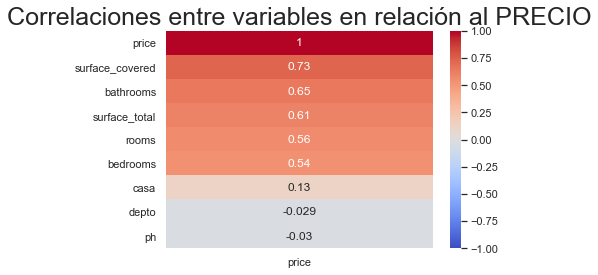

In [97]:
rdata_corr = df_4.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(rdata_corr[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO', size=25)

### Análisis de árboles en Random Forest

In [88]:
rf_regr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [89]:
rf_regr.feature_importances_

array([0.8050942 , 0.04041527, 0.02600942, 0.0520873 , 0.00119398,
       0.07295377, 0.00224606])

<div style="background-color:bisque; padding: 10px 10px 10px 10px" >
    <h4>Observaciones</h4>
    <p>Como puede observarse, hay una importancia destacada en el primer atributo de entrenamiento, que en nuestro caso sería <strong><i>surface_covered</i></strong></p>
    <p>La diferencia es tanta, que al parecer un modelo más ajustado quizás haya sido uno entrenado sólo con dicho atributo.</p>
    <hr>
    <p>Veamos qué sucede en algunos delos modelos específicos</p>
</div>

In [111]:
rf_regr.estimators_[0].feature_importances_

array([0.50282742, 0.11486536, 0.26731835, 0.07165102, 0.01621875,
       0.003322  , 0.02379711])

In [91]:
rf_regr.estimators_[50].feature_importances_

array([0.81656012, 0.03597519, 0.02694389, 0.05709492, 0.00097976,
       0.06140207, 0.00104405])

In [92]:
rf_regr.estimators_[99].feature_importances_

array([0.80348418, 0.0403029 , 0.02623103, 0.04715948, 0.00117412,
       0.07926718, 0.00238111])

<div style="background-color:bisque; padding: 10px 10px 10px 10px" >
    A lo largo de los estimadores, se pude observar la misma prevalencia en la importancia d variables. 
    Dicha prevalencia también conincide con el primer gráfico de esta sección, donde se visualiza la preeminencia del atributo <i>surface_covered</i> en el peso de las predicciones.
    <hr>
    <p>Los árboles no parecieran distinguirse significativamente.</p>
</div>

### Distribución de errores
<div style="background-color:lightgrey; padding: 10px 10px 10px 10px" >
    <h4>En random forest...</h4>
    <p>Este ha sido uno de los mejores modelos entrenados en este proyecto, junto a los modelos hechos con base en Bagging y XGBoost.</p>
    <p>Analizaremos un poco la distribución de errores en el mismo.</p>
</div>

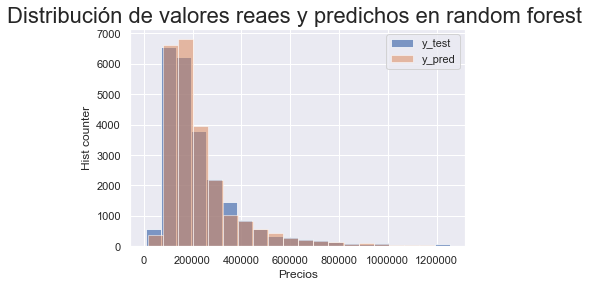

In [224]:
# Distribución de valores reales y predichos en random forest 

plt.hist(y_test,bins=20, alpha=0.7, label = 'y_test')
plt.hist(rf_y_test_pred,bins=20, alpha=0.5, label = 'y_pred')

plt.xlabel('Precios')
plt.ylabel('Hist counter')
plt.title('Distribución de precios test / pred')
plt.legend(loc='upper right')
plt.title('Distribución de valores reaes y predichos en random forest ', size=22)
plt.show()

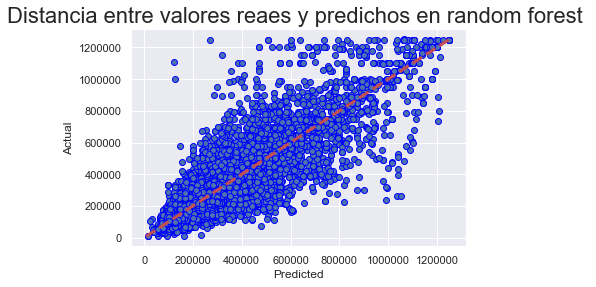

The model performance for testing set
--------------------------------------
MAE is 49282.50433962398
MSE is  82964.76781953742
R2 score is 0.7856548342916813


In [223]:
# Distancia entre valores reaes y predichos en random forest 

fig, ax = plt.subplots() 
ax.scatter(rf_y_test_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Distancia entre valores reaes y predichos en random forest ', size=22)
plt.show()

# model evaluation for testing set in RANDOM FOREST MODEL
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, rf_y_test_pred)
mse = metrics.mean_squared_error(y_test, rf_y_test_pred)
r2 = metrics.r2_score(y_test, rf_y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is ', (rf_rmse))
print('R2 score is {}'.format(r2))

<div style="background-color:bisque; padding: 10px 10px 10px 10px" >
    <p>Los errores parecieran ser mayores a mayor el valor del target, ya que una mayor concentración de valores correlacionados a la regresión son encontrados sobre todo a menores valores X.</p>
    <p>Sin embargo, habría que notar que dicho crecimiento de la distancia entre los valores predichos se deba justamente al crecimiento del valor de la variable predictora.</p>
    <p>Por lo que, con todo, podria apreciarse una uniformidad en los valores de predicción por sobre los valores actuaes..</p>
</div>

### Metodología y mejoras

<div style="background-color:lightgrey; padding: 10px 10px 10px 10px">
    <div>
    <h4>Modelos:</h4>
<p>Si bien hubo ua mejora sustancial en el rendimiento de los modelos del proyecto 01 al presente, no se exploraron mucho las posibilidades de mejora en relación a hiperparámetros. Después de todo, la mejora viene dada fundamentalmente por los beneficios del preprocesamiento de datos.</p>

<p>El problema adquiere un aspecto paradójico cuando analizamos los resultados de los modelos que justamente sí exploran variaciones en hiperparámetros. El trabajo hecho en RandomGridSearch no fue capaz de arrojar un mejor rendimiento que el logrado en los modelos de ensamble: Random Forest y Bagging.</p>

<p>Asimismo, por otro lado, no se exploraró en todo el proyecto ningún modelo avanzado basado en KNN (más allá del imputer), siendo el modelo que mejor rendimiento tuvo en el proyecto anterior. </p>
        <h4>Datos</h4>
    <p>Se podría haber generado nuevas variables, como la relación precio/mt2. Esto nos podría haber servido para tener una variable predictore potenciamente beneficiosa para nuestros modelos, ya que es un dato que hace sentido por lo menos desde el conocmiento de campo y que podríamos haber obtenido fácilmente con una operación de pandas.</p> <p>Queda así mismo como una duda si habría sido pertinente realizar un encodign de la columna relativa a los "barrios", ya que sabemos que es un dato muy importante en la valuación de una propiedad. Así, un dato que nos resulta imprenscindible como usuarios del campo, como cuando buscamos comprar o alquilar una unidad, no fue considerado en la construcción de los diferntes modelos. El único consuelo ante semejante decisión pasa por el reconocimeitno que traería aparejado el crecimiento multidimensinal al agregar 57 columnas al dataset</p>
    
    
</div>

## DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?